In [1]:
# import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# read the csv file using pandas library
df = pd.read_csv("Bank Customer Churn Prediction.csv")

In [3]:
# display the first five rows of the data
df.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# check if the dataset contains null values
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [5]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
# list of the features in the data
features = df.columns[:-1]
features

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary'],
      dtype='object')

In [7]:
# function is show the categorical and numerical values
def cat_num_values():
    cat = []
    num = []
    for i in features:
        if df[i].dtypes == 'O':
            cat.append(i)
        else:
            num.append(i)
            
    print("Categorical Columns are: ",cat)
    print()
    print("Numerical Columns are: ",num)

In [8]:
cat_num_values()

Categorical Columns are:  ['country', 'gender']

Numerical Columns are:  ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']


In [9]:
# relation between the columns
df.corr()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


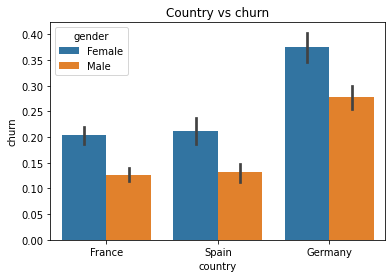

In [10]:
sns.barplot(x=df['country'],y=df['churn'],hue=df['gender'])
plt.title("Country vs churn");

<AxesSubplot: xlabel='credit_card', ylabel='count'>

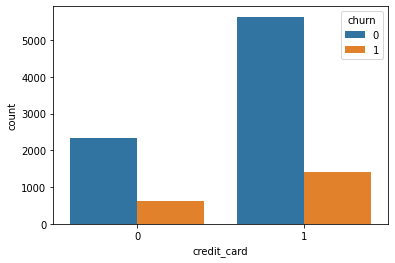

In [11]:
sns.countplot(x=df['credit_card'],hue=df['churn'])

<AxesSubplot: xlabel='tenure', ylabel='count'>

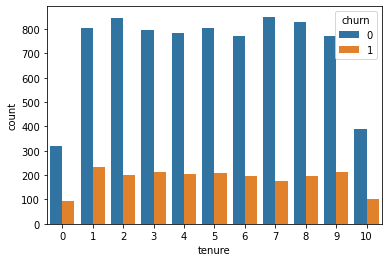

In [12]:
sns.countplot(x=df['tenure'],hue=df['churn'])

<AxesSubplot: xlabel='products_number', ylabel='count'>

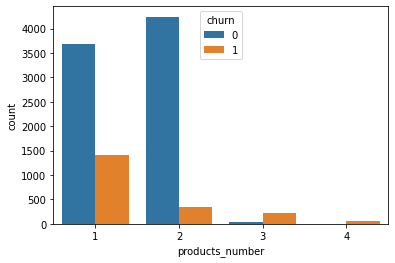

In [13]:
sns.countplot(x=df['products_number'],hue=df['churn'])

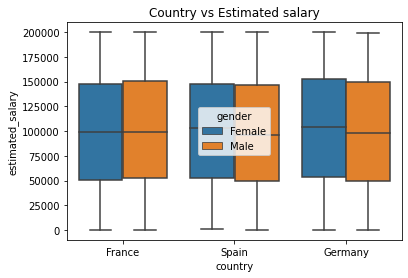

In [14]:
sns.boxplot(x=df['country'],y=df['estimated_salary'],hue=df['gender'])
plt.title("Country vs Estimated salary");

<AxesSubplot: >

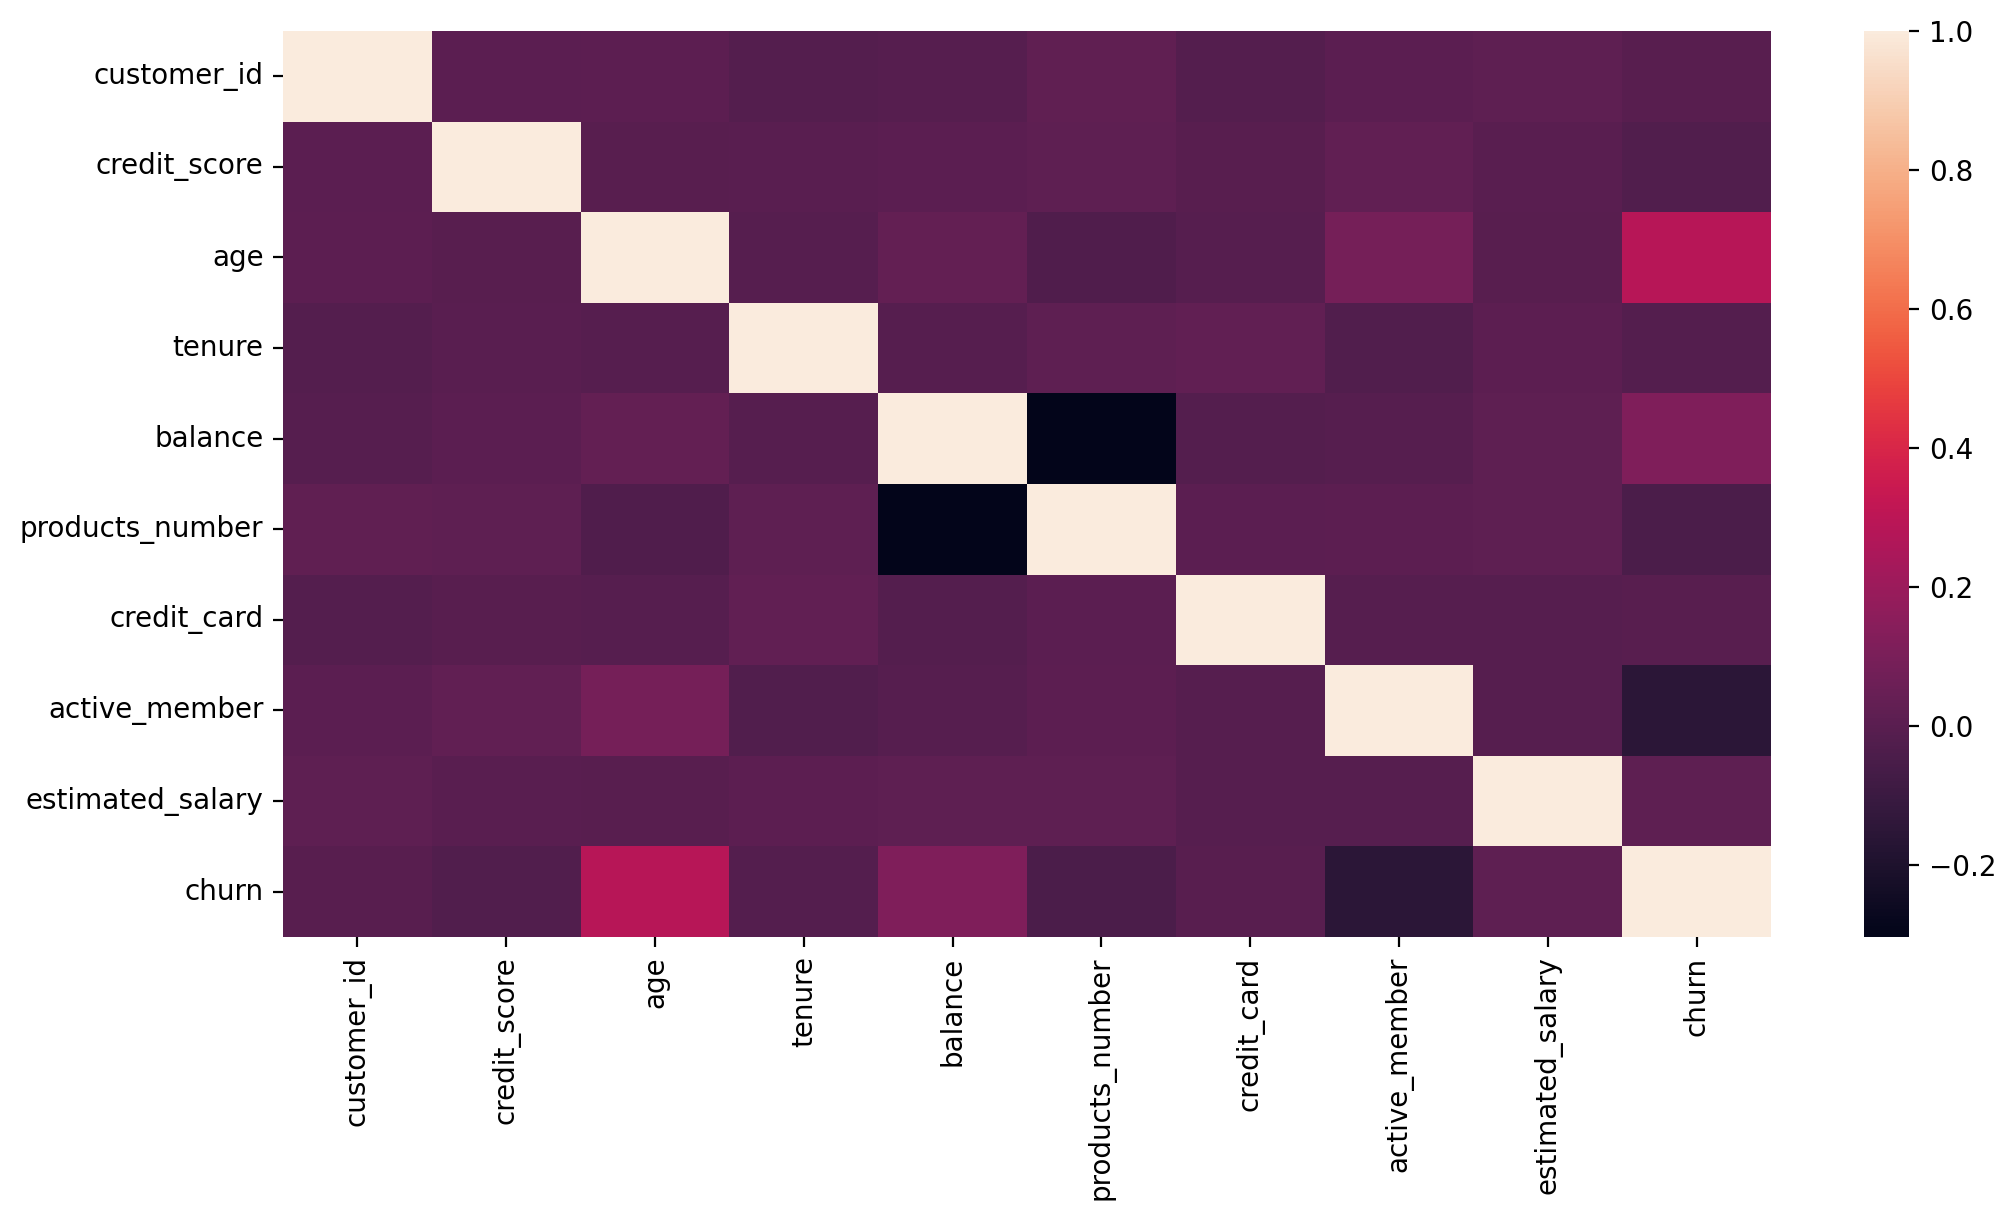

In [15]:
plt.figure(figsize=(12,6),dpi=200)
sns.heatmap(df.corr())

In [16]:
# delete the unimportant feature
df.drop('customer_id',inplace=True,axis=1)

In [17]:
#Convert catergorical variable such as "country" and "gender" into numerical
df['country'] = df['country'].map({'France':0, 'Germany':1 ,'Spain':2})
df['gender'] = df['gender'].map({'Male':0, 'Female':1})

In [18]:
X = df.drop('churn',axis=1)
y = df['churn']

In [19]:
pd.value_counts(y)

0    7963
1    2037
Name: churn, dtype: int64

In [21]:
# Using SMOTE inorder make both churn and No Churn balance because we can see above that they are more imbalances with 
# 7963 and 2037 in each class
S = SMOTE()
x_data,y_data = S.fit_resample(X,y)

In [22]:
pd.value_counts(y_data)

1    7963
0    7963
Name: churn, dtype: int64

In [24]:
# splitting the data into traning and testing
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=101)

In [26]:
# using MinMaxScaler to scaler the data before givining to ML model
scaler = MinMaxScaler()

In [27]:
# the training is fitted and transform using the scaler but as we do not want to expose our testing data, it is only been 
# transformed
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

## Logistic Regrssion

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logreg = LogisticRegression(n_jobs=-1)

In [30]:
# fitting the traning data to the logistic regression model
logreg.fit(X_train_scale,y_train)

LogisticRegression(n_jobs=-1)

In [31]:
# predicting on the test data
y_pred_logreg = logreg.predict(X_test_scale)

In [32]:
accuracy_score(y_pred_logreg,y_test)*100

75.83176396735719

In [33]:
print(classification_report(y_pred_logreg,y_test))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1497
           1       0.79      0.75      0.77      1689

    accuracy                           0.76      3186
   macro avg       0.76      0.76      0.76      3186
weighted avg       0.76      0.76      0.76      3186



In [34]:
confusion_matrix(y_pred_logreg,y_test)

array([[1156,  341],
       [ 429, 1260]], dtype=int64)

# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt = DecisionTreeClassifier()

In [37]:
# fitting the traning data to the decision tree model
dt.fit(X_train_scale,y_train)

DecisionTreeClassifier()

In [38]:
# predicting on the test data
y_pred_dt = dt.predict(X_test_scale)

In [39]:
accuracy_score(y_pred_dt,y_test)*100

77.77777777777779

In [40]:
print(classification_report(y_pred_dt,y_test))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1507
           1       0.80      0.77      0.78      1679

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



In [41]:
confusion_matrix(y_pred_dt,y_test)

array([[1192,  315],
       [ 393, 1286]], dtype=int64)

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier()

In [44]:
# fitting the traning data to the random forest model
rf.fit(X_train_scale,y_train)

RandomForestClassifier()

In [45]:
# predicting on the test data
y_pred_rf = rf.predict(X_test_scale)

In [46]:
accuracy_score(y_pred_rf,y_test)*100

84.58882611424984

In [47]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1554
           1       0.86      0.84      0.85      1632

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



In [48]:
confusion_matrix(y_pred_rf,y_test)

array([[1324,  230],
       [ 261, 1371]], dtype=int64)

# Support Vector Machine

In [49]:
from sklearn.svm import SVC

In [50]:
svm = SVC()

In [51]:
# fitting the traning data to the svm model
svm.fit(X_train_scale,y_train)

SVC()

In [52]:
# predicting on the test data
y_pred_svm = svm.predict(X_test_scale)

In [53]:
accuracy_score(y_pred_svm,y_test)*100

80.97928436911488

In [54]:
print(classification_report(y_pred_svm,y_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1645
           1       0.79      0.82      0.81      1541

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



In [55]:
confusion_matrix(y_pred_svm,y_test)

array([[1312,  333],
       [ 273, 1268]], dtype=int64)

# XGBoost

In [56]:
from xgboost import XGBClassifier

In [57]:
xgb = XGBClassifier()

In [58]:
# fitting the traning data to the XG Boost model
xgb.fit(X_train_scale,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [59]:
# predicting on the test data
y_pred_xgb = xgb.predict(X_test_scale)

In [60]:
accuracy_score(y_pred_xgb,y_test)*100

84.99686126804771

In [61]:
print(classification_report(y_pred_xgb,y_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1529
           1       0.87      0.84      0.85      1657

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



In [62]:
confusion_matrix(y_pred_xgb,y_test)

array([[1318,  211],
       [ 267, 1390]], dtype=int64)

# ANN

In [65]:
model = Sequential()

In [66]:
# adding the layers to the sequential model

model.add(Dense(units=200, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=145, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=40, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=10, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

In [68]:
callback = EarlyStopping(monitor='loss',patience=2)

In [69]:
model.compile(optimizer='adam',loss="binary_crossentropy")

In [70]:
model.fit(X_train_scale, y_train, 
          epochs=100,
          batch_size=32,callbacks=[callback])

Epoch 1/100
399/399 [==============================] - 7s 9ms/step - loss: 0.5613
Epoch 2/100
399/399 [==============================] - 4s 10ms/step - loss: 0.4906
Epoch 3/100
399/399 [==============================] - 6s 14ms/step - loss: 0.4615
Epoch 4/100
399/399 [==============================] - 6s 16ms/step - loss: 0.4517
Epoch 5/100
399/399 [==============================] - 7s 17ms/step - loss: 0.4407
Epoch 6/100
399/399 [==============================] - 6s 15ms/step - loss: 0.4340
Epoch 7/100
399/399 [==============================] - 6s 14ms/step - loss: 0.4361
Epoch 8/100
399/399 [==============================] - 6s 16ms/step - loss: 0.4296
Epoch 9/100
399/399 [==============================] - 6s 16ms/step - loss: 0.4217
Epoch 10/100
399/399 [==============================] - 6s 16ms/step - loss: 0.4206
Epoch 11/100
399/399 [==============================] - 7s 17ms/step - loss: 0.4196
Epoch 12/100
399/399 [==============================] - 6s 16ms/step - loss: 0.4184
Ep

In [71]:
loss = model.history.history['loss']

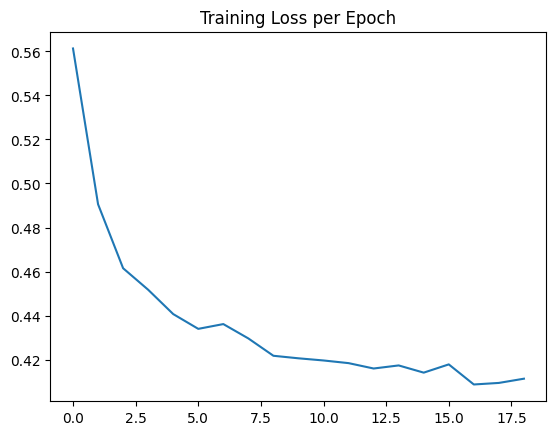

In [72]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [73]:
y_pred = model.predict(X_test_scale)

100/100 [==============================] - 0s 3ms/step


In [74]:
y_pred = (y_pred > 0.5)

In [75]:
pred = []

for s in y_pred:
    if s==False:
        pred.append(0)
    else: 
        pred.append(1)

In [76]:
accuracy_score(pred,y_test)*100

82.98807281858129

In [77]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1539
           1       0.85      0.82      0.83      1647

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



In [65]:
# saving all the most best model
import joblib

joblib.dump(xgb,"xgb_model.sav")
joblib.dump(scaler,"scaler.sav")

['scaler.sav']